In [1]:
import fair
import numpy as np
from fair.gas_cycle.gir import calculate_alpha, step_concentration

In [2]:
# def calculate_alpha(cumulative_emissions,airborne_fraction,temperature,r0,rC,rT,g0,g1,iirf_max = 97.0):
#     iirf = r0 + rC * (cumulative_emissions-airborne_fraction) + rT * temperature
#     iirf = np.abs(iirf)  # not sure I understand this - it should never be negative
#     iirf = (iirf>iirf_max) * iirf_max + iirf * (iirf<iirf_max)
#     alpha = g0 * np.sinh(iirf / g1)
#     return alpha

# def step_concentration(R_old,E,alpha,a,tau,PI_conc,emis2conc,dt=1):
#     R_new = E * emis2conc * a * alpha * (tau/dt) * (1. - np.exp(-dt/(alpha*tau))) + R_old * np.exp(-dt/(alpha*tau))
#     C = PI_conc + np.sum(R_new + R_old,axis=-1) / 2
#     G_A = np.sum(R_new,axis=-1) / emis2conc
#     return C,R_new,G_A

In [3]:
# still AR5-like IR models - can we tune?
a = np.array([0.217300, 0.224000, 0.282400, 0.276300])
tau = np.array([1000000.000000, 394.400000, 36.540000, 4.304000])
r0 = 32.4
rC = 0.019
rT = 4.165

In [4]:
r0

32.4

In [5]:
emissions = np.ones(100)*10
C = np.zeros(100)
G_A = np.zeros(100)
alpha = np.zeros(100)

iirf_horizon=100
g1 = np.sum(a*tau * (1 - (1 + iirf_horizon/tau) * np.exp(-iirf_horizon/tau)))
g0 = 1/(np.sinh(np.sum(a*tau*(1 - np.exp(-iirf_horizon/tau)) , axis=-1)/g1))

print(g1, g0)

11.413707797322035 0.020369508004424063


In [6]:
alpha[0] = calculate_alpha(0,G_A[0],0,r0=r0,rC=rC,rT=rT,g0=g0,g1=g1)
#alpha[0]

In [7]:
G = np.cumsum(emissions)
C[0],R,G_A[0] = step_concentration(
    np.zeros(a.shape),
    emissions[0],
    alpha[0],
    a,
    tau,
    278,
    dt=1
)

In [8]:
C

array([280.00381124,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [9]:
R

array([1.02071994, 1.04454364, 1.22718543, 0.71517346])

In [10]:
G_A

array([8.53176094, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [11]:
# forcing here
# temperature here

for t in np.arange(1,100):
    alpha[t] = calculate_alpha(G[t-1],G_A[t-1],0,r0=r0,rC=rC,rT=rT,g0=g0,g1=g1)
    C[t],R,G_A[t] = step_concentration(
        R,
        emissions[t],
        alpha[t],
        a,
        tau,
        278,
        dt=1
    )
    # forcing_here
    # temperature_here


In [12]:
import matplotlib.pyplot as pl

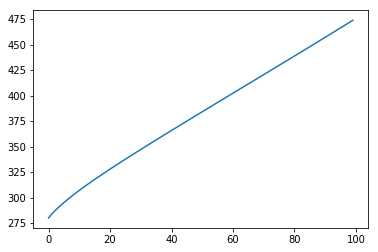

In [13]:
pl.plot(C)

In [14]:
G_A

array([  8.53176094,  15.53123556,  21.88949383,  27.87296916,
        33.58071659,  39.06393908,  44.35752253,  49.48879288,
        54.48030605,  59.35101387,  64.11694024,  68.79167189,
        73.38675148,  77.91200331,  82.37580592,  86.78532074,
        91.14668403,  95.46516773,  99.74531454, 103.9910511 ,
       108.20578293, 112.39247416, 116.55371443, 120.69177509,
       124.80865648, 128.90612773, 132.98576025, 137.04895603,
       141.0969715 , 145.13093771, 149.15187747, 153.1607198 ,
       157.15831225, 161.14543139, 165.12279173, 169.09105333,
       173.0508283 , 177.00268641, 180.94715988, 184.88474747,
       188.81591808, 192.74111379, 196.66075253, 200.5752304 ,
       204.48492368, 208.39019059, 212.29137283, 216.18879692,
       220.0827754 , 223.97360792, 227.86158209, 231.74697439,
       235.63005087, 239.51106782, 243.39027239, 247.26790309,
       251.14419028, 255.01935664, 258.89361757, 262.76718152,
       266.64025035, 270.51301967, 274.38567905, 278.25

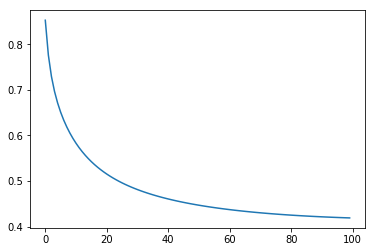

In [15]:
pl.plot(G_A/G)